# 0. Seleção dos algoritmos

## Linear Models
- Perceptron
- Linear SVC (SVM for classification)
## Support Vector Machines
- SVC (Support Vector Classification)
## Stochastic Gradient Descent
- SGDClassifier
## K Nearest Neighbors
- KNearestNeighbors
## Naive Bayes
- Gaussian Naive Bayes
## Decision Trees
- CART
## Ensemble methods
- Random Forests
## Neural network models
- Multi-layer Perceptron

# 1. Preparando o ambiente

In [1]:
import numpy as np
import pandas as pd

#Algoritmos
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2. Configurando os algoritmos

In [2]:
classifiers= []
names = []

## 2.1. Perceptron

In [3]:
names.append('Perceptron')
classifiers.append(Perceptron())
classifiers[-1]

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## 2.2. LinearSVC

In [4]:
names.append('SVC Linear')
classifiers.append(LinearSVC())
classifiers[-1]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## 2.3. SVC

In [5]:
names.append('SVC')
classifiers.append(SVC())
classifiers[-1]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 2.4. SGDClassifier

In [6]:
names.append('SGD')
classifiers.append(SGDClassifier())
classifiers[-1]

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

## 2.5. NearestNeighbors

In [7]:
names.append('K-NN')
classifiers.append(KNeighborsClassifier(n_neighbors=7))
classifiers[-1]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

## 2.6. GaussianNB

In [8]:
names.append('Naive-Bayes')
classifiers.append(GaussianNB())
classifiers[-1]

GaussianNB(priors=None)

## 2.7. tree

In [9]:
names.append('Árvore de Decisão')
classifiers.append(tree.DecisionTreeClassifier())
classifiers[-1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 2.8. RandomForestClassifier

In [10]:
names.append('Random Forest')
classifiers.append(RandomForestClassifier())
classifiers[-1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 2.9. MLPClassifier

In [11]:
names.append('MLP')
classifiers.append(MLPClassifier())
classifiers[-1]

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# 2. Preparação e Análise dos dados

In [12]:
dataset = pd.read_csv('dataset.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [13]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,NaN
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,NaN
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,NaN
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,NaN
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,NaN


In [14]:
rotulos = pd.read_csv('rotulos.csv')

In [15]:
dataset['is_category_candidate'] = rotulos['target']

In [16]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,no
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,no


In [17]:
dataset.dtypes

sentence                  object
word                      object
nell_category             object
word_tag                  object
nell_category_tag         object
word_is_category          object
distance_from_category     int64
number_of_occurrences      int64
is_category_candidate     object
dtype: object

In [18]:
#Alterando tipos de dados identificados automáticamente
dataset['nell_category'] = pd.Categorical(dataset['nell_category'])
dataset['word_tag'] = pd.Categorical(dataset['word_tag'])
dataset['nell_category_tag'] = pd.Categorical(dataset['nell_category_tag'])
dataset['word_is_category'] = pd.Categorical(dataset['word_is_category'])
dataset['is_category_candidate'] = pd.Categorical(dataset['is_category_candidate'])
dataset.dtypes  

sentence                    object
word                        object
nell_category             category
word_tag                  category
nell_category_tag         category
word_is_category          category
distance_from_category       int64
number_of_occurrences        int64
is_category_candidate     category
dtype: object

In [19]:
dataset.describe(exclude=['category','object'])

,distance_from_category,number_of_occurrences
count,372.000000,372.000000
mean,10.061828,5.258065
std,31.646531,5.420642
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,3.000000
75%,3.000000,7.000000
max,240.000000,18.000000


In [20]:
#Análise dos dados
dataset.describe(include=['category'])

,nell_category,word_tag,nell_category_tag,word_is_category,is_category_candidate
count,372,324,355,372,372
unique,15,5,3,2,2
top,actor,JJ,NNS,no,no
freq,251,202,231,314,271


In [21]:
# Tratamento de dados faltantes
dataset.isnull().sum()

sentence                   0
word                       0
nell_category              0
word_tag                  48
nell_category_tag         17
word_is_category           0
distance_from_category     0
number_of_occurrences      0
is_category_candidate      0
dtype: int64

In [22]:
dataset.head()

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,no
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,no


# Pt2

In [23]:
dataset[dataset.is_category_candidate == "yes"].word_tag.value_counts()

JJ     58
NN     24
NNS    11
VBP     0
VBN     0
Name: word_tag, dtype: int64

In [24]:
dataset[dataset.is_category_candidate == "no"].word_tag.value_counts()

JJ     144
NN      54
NNS     31
VBP      1
VBN      1
Name: word_tag, dtype: int64

In [25]:
dataset2 = dataset[(~dataset.word_tag.isin(['VBN', 'VBP']))]
dataset2

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
1,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
2,Bad rap actors good rap actors list?,good,actor,JJ,NNS,no,1,11,no
3,Bad rap actors good rap actors list?,rap,actor,NN,NNS,no,1,2,no
4,Bad rap actors good rap actors list?,list,actor,NN,NNS,no,4,7,no
5,list of hispanic actors?,hispanic,actor,JJ,NNS,no,1,4,yes
6,Who are a and b list actors?,list,actor,NN,NNS,no,1,7,no
7,List of famous black actors?,famous,actor,JJ,NNS,no,2,10,no
8,List of famous black actors?,black,actor,JJ,NNS,no,1,7,yes
9,How many nerdy/geeky actors can you list?,many,actor,JJ,NNS,no,2,3,no


In [26]:
dataset2.word.describe()

count       370
unique      140
top       actor
freq         27
Name: word, dtype: object

In [27]:
dataset2.word_is_category.describe()

count     370
unique      2
top        no
freq      312
Name: word_is_category, dtype: object

In [49]:
dataset2.is_category_candidate.describe()

count     370
unique      2
top        no
freq      269
Name: is_category_candidate, dtype: object

In [28]:
len(dataset2.iloc[-1].sentence.split(' '))

46

In [29]:
dataset2.iloc[-1].distance_from_category

58

In [30]:
dataset2.iloc[-1].sentence

'I am looking for A or B-list actors that fit the following discriptions \r\n1. Age 17, female, brunnete \r\n2. Age 17, female, blonde \r\n3. Age 17, male, short hair, blonde \r\n4. Age 17, male, long hair, brunnete \r\n5. Age 14, brown hair, large chest, female '

In [31]:
dataset2.nell_category_tag.value_counts()

NNS    229
NN      89
JJ      35
Name: nell_category_tag, dtype: int64

In [32]:
dataset2.groupby('is_category_candidate').nell_category_tag.value_counts()

is_category_candidate  nell_category_tag
no                     NNS                  160
                       NN                    80
                       JJ                    18
yes                    NNS                   69
                       JJ                    17
                       NN                     9
Name: nell_category_tag, dtype: int64

In [33]:
df = dataset2.copy()[['word_tag', 'nell_category_tag', 'word_is_category', 'number_of_occurrences', 'is_category_candidate']]
df


,word_tag,nell_category_tag,word_is_category,number_of_occurrences,is_category_candidate
0,JJ,NNS,no,3,yes
1,NN,NNS,no,2,no
2,JJ,NNS,no,11,no
3,NN,NNS,no,2,no
4,NN,NNS,no,7,no
5,JJ,NNS,no,4,yes
6,NN,NNS,no,7,no
7,JJ,NNS,no,10,no
8,JJ,NNS,no,7,yes
9,JJ,NNS,no,3,no


In [34]:
df.dtypes

word_tag                 category
nell_category_tag        category
word_is_category         category
number_of_occurrences       int64
is_category_candidate    category
dtype: object

In [35]:
dff = pd.DataFrame()
dff['word_tag'] = df.word_tag.cat.codes
dff['nell_category_tag'] = df.nell_category_tag.cat.codes
dff['word_is_category'] = df.word_is_category.cat.codes
dff['is_category_candidate'] = df.is_category_candidate.cat.codes
dff['number_of_occurrences'] = df.number_of_occurrences
dff.head()

,word_tag,nell_category_tag,word_is_category,is_category_candidate,number_of_occurrences
0,0,2,0,1,3
1,1,2,0,0,2
2,0,2,0,0,11
3,1,2,0,0,2
4,1,2,0,0,7


In [36]:
#import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [47]:
?MLPClassifier

In [37]:
result = []
x = dff.drop(columns=['is_category_candidate']).values
y = dff['is_category_candidate'].values

for trainidx, testidx in KFold(n_splits=10).split(dff):
    for name, clf in zip(names, classifiers):
        clf.fit(x[trainidx], y[trainidx])
        
        preds = clf.predict(x[testidx])
        score = accuracy_score(y_pred=preds, y_true=y[testidx])
        result.append({'Classifier': name, 'Accuracy': score})

df_result = pd.DataFrame(result)

/Users/wesley/.pyenv/versions/jupyter3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/wesley/.pyenv/versions/jupyter3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

/Users/wesley/.pyenv/versions/jupyter3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/wesley/.pyenv/versions/jupyter3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/wesley/.pyenv/versions/jupyter3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.

In [38]:
df_result.head()

,Accuracy,Classifier
0,0.378378,Perceptron
1,0.621622,SVC Linear
2,0.675676,SVC
3,0.621622,SGD
4,0.702703,K-NN


In [39]:
avg_result = df_result.groupby('Classifier').mean()
avg_result

,Accuracy
Classifier,
K-NN,0.754054
MLP,0.735135
Naive-Bayes,0.705405
Perceptron,0.443243
Random Forest,0.800000
SGD,0.681081
SVC,0.783784
SVC Linear,0.727027
Árvore de Decisão,0.797297


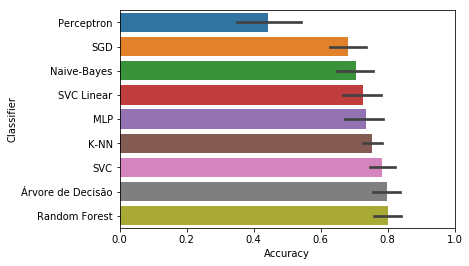

In [40]:
result_sort = df_result.copy()
result_sort['Mean'] = 0
for name in names:
    result_sort.loc[result_sort.Classifier == name, 'Mean'] = avg_result.loc[name, 'Accuracy']

ax = sns.barplot(y='Classifier', x='Accuracy', data=result_sort.sort_values('Mean'), ci=90, orient='h')
#plt.xticks(rotation=90);
plt.xlim((0, 1));
#intervalo

In [41]:
df_result[df_result.Classifier == 'Perceptron']

,Accuracy,Classifier
0,0.378378,Perceptron
9,0.540541,Perceptron
18,0.216216,Perceptron
27,0.243243,Perceptron
36,0.702703,Perceptron
45,0.297297,Perceptron
54,0.513514,Perceptron
63,0.729730,Perceptron
72,0.243243,Perceptron
81,0.567568,Perceptron


In [100]:
? stats.f_oneway

In [92]:
clfs = []
popu = []
for x in df_result.groupby('Classifier').groups:
    clfs.append(x)
    popu.append(np.array(df_result.loc[df_result.Classifier == x, 'Accuracy']))
    
popu

[array([0.7027027 , 0.67567568, 0.75675676, 0.67567568, 0.75675676,
        0.78378378, 0.81081081, 0.72972973, 0.81081081, 0.83783784]),
 array([0.62162162, 0.45945946, 0.78378378, 0.75675676, 0.72972973,
        0.83783784, 0.75675676, 0.83783784, 0.75675676, 0.81081081]),
 array([0.62162162, 0.48648649, 0.75675676, 0.67567568, 0.62162162,
        0.86486486, 0.67567568, 0.81081081, 0.72972973, 0.81081081]),
 array([0.37837838, 0.54054054, 0.21621622, 0.24324324, 0.7027027 ,
        0.2972973 , 0.51351351, 0.72972973, 0.24324324, 0.56756757]),
 array([0.78378378, 0.64864865, 0.78378378, 0.72972973, 0.75675676,
        0.91891892, 0.89189189, 0.75675676, 0.89189189, 0.83783784]),
 array([0.62162162, 0.45945946, 0.56756757, 0.75675676, 0.72972973,
        0.67567568, 0.64864865, 0.78378378, 0.75675676, 0.81081081]),
 array([0.67567568, 0.7027027 , 0.81081081, 0.72972973, 0.75675676,
        0.83783784, 0.81081081, 0.75675676, 0.86486486, 0.89189189]),
 array([0.62162162, 0.45945946, 0.

In [93]:
clfs

['K-NN',
 'MLP',
 'Naive-Bayes',
 'Perceptron',
 'Random Forest',
 'SGD',
 'SVC',
 'SVC Linear',
 'Árvore de Decisão']

In [85]:
df_result.to_csv('result.csv')

In [99]:
results = np.zeros((len(popu), len(popu)))
for i in range(len(popu)):
    for j in range(len(popu)):
        results[i, j] = stats.f_oneway(popu[i], popu[j])[1]

pvalues = pd.DataFrame(results, columns = [clfs], index=[clfs])
pvalues <= 0.05

,K-NN,MLP,Naive-Bayes,Perceptron,Random Forest,SGD,SVC,SVC Linear,Árvore de Decisão
K-NN,False,False,False,True,False,False,False,False,False
MLP,False,False,False,True,False,False,False,False,False
Naive-Bayes,False,False,False,True,True,False,False,False,False
Perceptron,True,True,True,False,True,True,True,True,True
Random Forest,False,False,True,True,False,True,False,False,False
SGD,False,False,False,True,True,False,True,False,True
SVC,False,False,False,True,False,True,False,False,False
SVC Linear,False,False,False,True,False,False,False,False,False
Árvore de Decisão,False,False,False,True,False,True,False,False,False


In [83]:
?stats.f_oneway

In [42]:
from scipy import stats

stats.ttest_ind(df_result.loc[df_result.Classifier == 'Perceptron', 'Accuracy'].values,
                df_result.loc[df_result.Classifier == 'Random Forest', 'Accuracy'].values)

Ttest_indResult(statistic=-5.345497546844785, pvalue=4.422505563950094e-05)

In [43]:
stats.ttest_ind(df_result.loc[df_result.Classifier == 'Random Forest', 'Accuracy'].values,
                df_result.loc[df_result.Classifier == 'Árvore de Decisão', 'Accuracy'].values)

Ttest_indResult(statistic=0.0721479105365845, pvalue=0.9432798307959438)

In [44]:
dataset[(dataset.word_tag == 'JJ') & (dataset.is_category_candidate == 'yes')]

,sentence,word,nell_category,word_tag,nell_category_tag,word_is_category,distance_from_category,number_of_occurrences,is_category_candidate
0,Bad rap actors good rap actors list?,bad,actor,JJ,NNS,no,2,3,yes
5,list of hispanic actors?,hispanic,actor,JJ,NNS,no,1,4,yes
8,List of famous black actors?,black,actor,JJ,NNS,no,1,7,yes
14,Give me a list of attractive iranian actors.?,iranian,actor,JJ,NNS,no,1,1,yes
17,List of comic actors?,comic,actor,JJ,NNS,no,1,1,yes
18,Can some give me a list of Black Martial artis...,black,actor,JJ,NNS,no,3,7,yes
19,Can some give me a list of Black Martial artis...,martial,actor,JJ,NNS,no,2,1,yes
31,Scottish actors???????,scottish,actor,JJ,NNS,no,1,3,yes
32,Hispanic actors?,hispanic,actor,JJ,NNS,no,1,4,yes
37,Can someone help me with a list of famous Germ...,german,actor,JJ,NNS,no,1,1,yes


In [45]:
xgscores = []
for trainidx, testidx in KFold(n_splits=10).split(dff):
    x = dff.drop(columns=['is_category_candidate']).values
    y = dff['is_category_candidate'].values
    
    xgtrain = xgb.DMatrix(x[trainidx], y[trainidx])
    xgtest = xgb.DMatrix(x[testidx], y[testidx])
    
    params = {'max_depth':3, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
    num_round = 2
    bst = xgb.train(params, xgtrain, num_round)
    
    preds = bst.predict(xgtest) > 0.5
    xgscores.append((preds.astype(np.int32) == xgtest.get_label()).sum() / len(preds))
    
np.mean(xgscores)

NameError: name 'xgb' is not defined